<a href="https://colab.research.google.com/github/sebasmendo1/country-data/blob/main/Group_47_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(rvest)
library(lubridate)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [38]:
data <- read.csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
world_population <- read.csv("https://raw.githubusercontent.com/sebasmendo1/country-data/main/population-data.csv")

#Population data from UN: https://population.un.org/wpp/Download/Standard/Population/

In [4]:
covid_data <- mutate(data, date = as.Date(date, format= "%Y-%m-%d"))

In [43]:
covid_data_filter <- filter(data, date == "2020-11-01", total_deaths != "NA", location != "World") %>% 
                      select("date", "location", "total_cases", "total_deaths")%>%
#(-"weekly_cases", -"weekly_deaths", -"biweekly_cases", -"biweekly_deaths")
covid_data_filter

date,location,total_cases,total_deaths
<chr>,<chr>,<int>,<int>
2020-11-01,Afghanistan,41501,1536
2020-11-01,Albania,20875,509
2020-11-01,Algeria,57942,1964
2020-11-01,Andorra,4756,75
2020-11-01,Angola,10558,279
2020-11-01,Antigua and Barbuda,128,3
2020-11-01,Argentina,1166911,31002
2020-11-01,Armenia,92254,1363
2020-11-01,Aruba,4513,38


In [57]:
#Wrangling the world population to have country name and values for the year 2018 (the most recent year found in the dataset). 
world_population_2018 <- filter(world_population, Year == "2018") %>% 
                          select(Country.Name, Year, Value)

rename_test 
head(world_population_2018)

,Country.Name,Year,Value
,<chr>,<int>,<int>
1,Afghanistan,2018,37172386
2,Albania,2018,2866376
3,Algeria,2018,42228429
4,American Samoa,2018,55465
5,Andorra,2018,77006
6,Angola,2018,30809762


In [107]:
#Add the population numbers to the COVID data. 

covid_data_standardized <- left_join(covid_data_filter, world_population_2018, by = c("location"= "Country.Name")) %>%
                              filter(Value != "NA") %>%
                              select(location, total_cases, total_deaths, Value) %>%
                              mutate(std_cases = total_cases/Value * 100) %>%
                              mutate(std_deaths = total_deaths/Value *100) %>%
                              select(location, std_cases, std_deaths)
head(covid_data_standardized)

,location,std_cases,std_deaths
,<chr>,<dbl>,<dbl>
1,Afghanistan,0.11164470,0.0041320996
2,Albania,0.72827152,0.0177576145
3,Algeria,0.13721088,0.0046508953
4,Andorra,6.17614212,0.0973950082
5,Angola,0.03426836,0.0009055571
6,Antigua and Barbuda,0.13293729,0.0031157178


As we began to create the plot for COVID cases vs. COVID deaths, we realized that there were huge disperities between the total numbers of certain countries. Because of this, we decided to standardize data with total population as this would give us a more accurate estimate of each country's stiuation. 

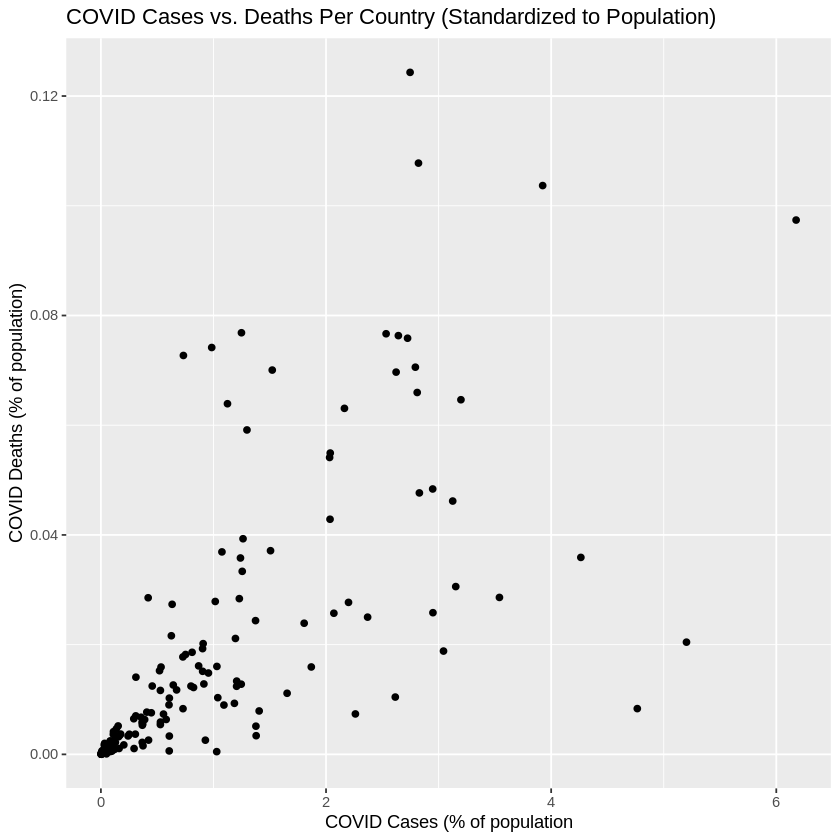

In [109]:
covid_scatter <- ggplot(covid_data_standardized, aes(x = std_cases, y = std_deaths)) +
            geom_point() +
            xlab("COVID Cases (% of population") +
            ylab("COVID Deaths (% of population)") +
            labs(title = "COVID Cases vs. Deaths Per Country (Standardized to Population)")
covid_scatter

In [116]:
#Once the data is standardized and plotted, it's time to cluster it into three categories:
set.seed(1234)

covid_cluster <- kmeans(covid_data_standardized$std_deaths, centers = 3)
covid_cluster

K-means clustering with 3 clusters of sizes 31, 20, 114

Cluster means:
        [,1]
1 0.02914195
2 0.07609011
3 0.00481819

Clustering vector:
  [1] 3 1 3 2 3 3 2 1 1 3 3 3 1 3 3 3 2 3 3 3 2 1 3 2 3 1 3 3 3 1 3 3 3 2 3 2 3
 [38] 1 3 3 3 3 3 1 3 3 1 2 3 3 3 3 3 3 2 3 3 3 3 3 3 1 1 3 3 3 3 1 1 3 3 3 1 1
 [75] 1 1 2 3 3 3 3 3 1 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 2 2 3 1 3 3 3 3 3 1 3
[112] 3 3 3 3 3 1 3 2 3 1 2 3 3 1 1 3 1 3 2 3 3 3 3 3 3 2 3 3 1 3 2 3 3 1 2 1 3
[149] 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 0.002466537 0.006438560 0.002619137
 (between_SS / total_SS =  88.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [110]:
sort_cases <- covid_data_standardized[order(-covid_data_standardized$std_cases),]

sort_deaths <- covid_data_standardized[order(-covid_data_standardized$std_deaths),]
